### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data:

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [128]:
data = pd.read_csv("Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

In [130]:
# Your code here
data.drop(columns=['StudentID', 'Ethnicity', 'Volunteering', 'Gender'], inplace=True)

### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [131]:
# Your code here
data.isnull().sum()

,0
Age,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0
Sports,0
Music,0
GPA,0


### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.

 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [132]:
def prepare_data(data):
    X = data.drop('GPA', axis=1)
    y = data['GPA']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test

In [133]:
# Your code here
X_train, X_test, y_train, y_test = prepare_data(data)

### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

In [134]:
# Your code here
model_one = Sequential()
model_one.add(Dense(64, input_dim=10, activation='relu'))
model_one.add(Dense(32, activation='relu'))
model_one.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 8. Compile your Neural Network
- Choose Adam as the optimizer
- And MSE as the Loss function
- Also add the following metrics: Mean Absolute Error

In [135]:
# Your code here
model_one.compile(optimizer='adam', loss='mse', metrics=['mae'])

### 9. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [136]:
# Your code here
history = model_one.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2, verbose=False)

### 10. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Training and Validation Loss over Epochs
- In a second graph:
   - Plot the Training MAE and the Validation MAE
   - X Label = Epochs
   - Y Label = Mean Absolute Error (MAE)
   - Title = Training and Validation MAE over Epochs

Text(0.5, 1.0, 'Training and Validation Loss over Epochs')

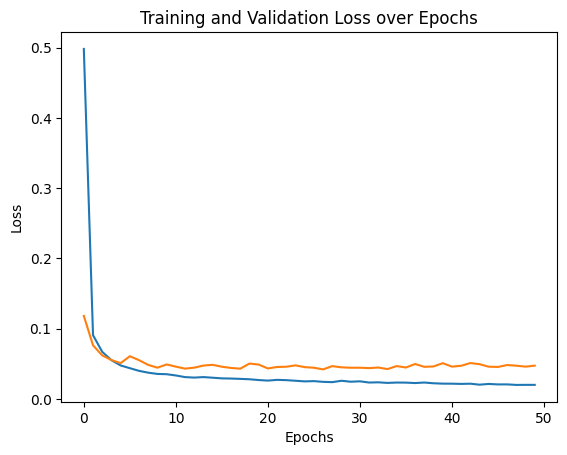

In [137]:
# Your code here
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')

Text(0.5, 1.0, 'Training and Validation MAE over Epochs')

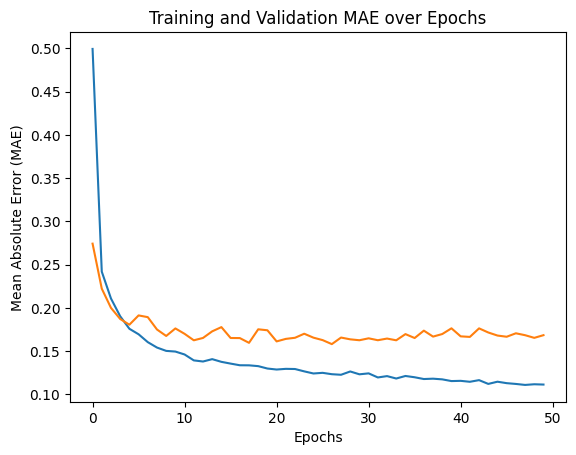

In [138]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE over Epochs')

### 11. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [139]:
# Your code here
model_loss_data = []
loss, mae = model_one.evaluate(X_test, y_test)
print(f'Loss: {loss}, MAE: {mae}')
model_loss_data.append({"Model": "Model 1", "loss": loss, "mae": mae})

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0485 - mae: 0.1712 
Loss: 0.045191723853349686, MAE: 0.16433674097061157


### 12. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- How good was your model?

In [140]:
# Your code here
predictions = model_one.predict(X_test)
for i in range(len(predictions) // 5):
    print(f'Prediction: {predictions[i][0]}, Actual: {y_test.iloc[i]}')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Prediction: 1.3534990549087524, Actual: 1.4277243762746905
Prediction: 2.8435449600219727, Actual: 3.117354434785501
Prediction: 2.0197153091430664, Actual: 2.037768574636005
Prediction: 3.7305214405059814, Actual: 3.5485205508668662
Prediction: 0.4722385108470917, Actual: 0.2489771312307257
Prediction: 2.774528980255127, Actual: 2.627693905554347
Prediction: 1.553473711013794, Actual: 2.057378500596372
Prediction: 2.0879266262054443, Actual: 2.248337588471201
Prediction: 2.2687456607818604, Actual: 2.1947065208246226
Prediction: 0.8707337379455566, Actual: 0.7581829737450007
Prediction: 2.783677816390991, Actual: 2.370893096932428
Prediction: 0.6151427030563354, Actual: 0.7664048694920337
Prediction: 2.8205580711364746, Actual: 2.952721567213245
Prediction: 2.8101377487182617, Actual: 2.3433313526833226
Prediction: 2.790081739425659, Actual: 2.7718106588704914
Prediction: 0.12372493743896484, Actual: 0.2878673233291232
Prediction: 1.118215680122

### 13. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

Reduje a la mitad la arquitectura, cmabie la funcion de loss, y quite la columna de edad

In [177]:
# Your code here
data = pd.read_csv("Student_performance_data _.csv")
data.drop(columns=['StudentID', 'Ethnicity', 'Volunteering', 'Gender', 'Age'], inplace=True)
X_train, X_test, y_train, y_test = prepare_data(data)

model_two = Sequential()
model_two.add(Dense(32, input_dim=9, activation='relu'))
model_two.add(Dense(16, activation='relu'))
model_two.add(Dense(1))
model_two.compile(optimizer='adam', loss='mean_squared_logarithmic_error', metrics=['mae'])
history = model_two.fit(X_train, y_train, epochs=200, batch_size=20, validation_split=0.2, verbose=False)
loss, mae = model_two.evaluate(X_test, y_test)
model_loss_data.append({"Model": "Model 2", "loss": loss, "mae": mae})
print(model_loss_data)

predictions = model_two.predict(X_test)
for i in range(5):
    print(f'Prediction: {predictions[i][0]}, Actual: {y_test.iloc[i]}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0079 - mae: 0.1640 


[{'Model': 'Model 1', 'loss': 0.045191723853349686, 'mae': 0.16433674097061157}, {'Model': 'Model 2', 'loss': 0.008340858854353428, 'mae': 0.16363826394081116}, {'Model': 'Model 3', 'loss': 0.009083112701773643, 'mae': 0.1629931479692459}, {'Model': 'Model 2', 'loss': 0.00831717997789383, 'mae': 0.16170291602611542}]
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Prediction: 1.6162331104278564, Actual: 1.4277243762746905
Prediction: 3.2977898120880127, Actual: 3.117354434785501
Prediction: 1.859184741973877, Actual: 2.037768574636005
Prediction: 3.592552900314331, Actual: 3.5485205508668662
Prediction: 0.38193225860595703, Actual: 0.2489771312307257


#### Model 3:
- Changes:
   - Dataset Data Engineering
   - Model Definition
   - Model Compile
   - Model Training

Cambie la funcion de loss, en la capa de en medio cambie el activador a tanh, y quite la columna de edad

In [178]:
# Your code here# Your code here
data = pd.read_csv("Student_performance_data _.csv")
data.drop(columns=['StudentID', 'Ethnicity', 'Volunteering', 'Gender', 'Age'], inplace=True)
X_train, X_test, y_train, y_test = prepare_data(data)

model_three = Sequential()
model_three.add(Dense(64, input_dim=9, activation='relu'))
model_three.add(Dense(32, activation='tanh'))
model_three.add(Dense(1))
model_three.compile(optimizer='adam', loss='mean_squared_logarithmic_error', metrics=['mae'])
history = model_three.fit(X_train, y_train, epochs=200, batch_size=20, validation_split=0.2, verbose=False)
loss, mae = model_three.evaluate(X_test, y_test)
model_loss_data.append({"Model": "Model 3", "loss": loss, "mae": mae})
print(model_loss_data)

predictions = model_three.predict(X_test)
for i in range(5):
    print(f'Prediction: {predictions[i][0]}, Actual: {y_test.iloc[i]}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0109 - mae: 0.1825 
[{'Model': 'Model 1', 'loss': 0.045191723853349686, 'mae': 0.16433674097061157}, {'Model': 'Model 2', 'loss': 0.008340858854353428, 'mae': 0.16363826394081116}, {'Model': 'Model 3', 'loss': 0.009083112701773643, 'mae': 0.1629931479692459}, {'Model': 'Model 2', 'loss': 0.00831717997789383, 'mae': 0.16170291602611542}, {'Model': 'Model 3', 'loss': 0.010458946228027344, 'mae': 0.17571096122264862}]
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Prediction: 1.4133299589157104, Actual: 1.4277243762746905
Prediction: 2.736938953399658, Actual: 3.117354434785501
Prediction: 2.1281964778900146, Actual: 2.037768574636005
Prediction: 3.66591215133667, Actual: 3.5485205508668662
Prediction: 0.4251338839530945, Actual: 0.2489771312307257


In [143]:
models_df = pd.DataFrame(model_loss_data)
models_df

,Model,loss,mae
0,Model 1,0.045192,0.164337
1,Model 2,0.008341,0.163638
2,Model 3,0.009083,0.162993


In [179]:
students_sample = pd.read_csv("Student_performance_data _.csv")
students_sample = students_sample.sample(5)
students_sample.drop(columns=['StudentID', 'Ethnicity', 'Volunteering', 'Gender'], inplace=True)
students_sample_gpa = students_sample['GPA']
students_sample.drop(columns=['GPA'], inplace=True)
students_sample_two = students_sample.copy().drop(columns=['Age'])
students_predictions = []

In [180]:
scaler = StandardScaler()
students_sample = scaler.fit_transform(students_sample)
students_sample_two = scaler.fit_transform(students_sample_two)

model_one_data = students_sample
model_two_data = students_sample_two
model_three_data = students_sample_two

In [181]:
predictions_model_one = model_one.predict(model_one_data)
predictions_model_two = model_two.predict(model_two_data)
predictions_model_three = model_three.predict(model_three_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [183]:
results = pd.DataFrame(
    {'Model 1': predictions_model_one.flatten(),
     'Model 2': predictions_model_two.flatten(),
     'Model 3': predictions_model_three.flatten(),
     'Actual': students_sample_gpa,
     })
results

,Model 1,Model 2,Model 3,Actual
1290,1.196351,1.333652,1.196541,1.469389
1344,0.999945,0.837122,0.869391,1.671969
543,2.158336,1.830878,2.131191,2.240870
143,1.779981,1.991681,1.760331,2.033545
440,3.129700,2.847324,3.129833,3.106230
